In [84]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_drug_df, clinical_trial_df, how="outer", on=["Mouse ID"])

# Display the data table for preview
merge_df.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [85]:
drug_list = sorted(merge_df['Drug'].unique())
timepoints = merge_df['Timepoint'].unique()

# Store the Mean Tumor Volume and Standard Error in a new drug dataframe
drug_df = pd.DataFrame(columns=['Drug','Timepoint','Tumor Volume (mm3)','Standard Error'])

# Store the Mean Met. Site Data and Standard Error in a new meta dataframe
meta_df = pd.DataFrame(columns=['Drug','Timepoint','Metastatic Sites','Meta Standard Error'])

# Store the mouse count and survival rate in a new mouse dataframe
mouse_df = pd.DataFrame(columns=['Drug','Timepoint','Mouse Count','Survival Rate'])

# Calculate the Tumor Size
def calc_avg_vol(x,y,df, i):
    avg_vol = df['Tumor Volume (mm3)'].mean()
    std_err = stats.sem(temp_df['Tumor Volume (mm3)'].values, axis=0)
    drug_df.loc[i] = [x,y,avg_vol,std_err]

# Calculate the Metastatic Sites
def calc_meta(x,y,df,i):
    avg_meta = df['Metastatic Sites'].mean()
    meta_std_err = stats.sem(temp_df['Metastatic Sites'].values, axis=0)
    meta_df.loc[i] = [x,y,avg_meta,meta_std_err]
    
# Calculate Survival Rates
def calc_mouse_count(x,y,df,i):
    mouse_count = df['Mouse ID'].count()
    start_count = 25
    surv_rate = mouse_count / start_count * 100
    mouse_df.loc[i] = [x,y,mouse_count,surv_rate]

idx = 0
for drug in drug_list:
    for time in timepoints:
        temp_df =  merge_df.loc[(merge_df['Drug'] == drug) & (merge_df['Timepoint'] == time)]
        calc_avg_vol(drug,time,temp_df, idx)
        calc_meta(drug,time,temp_df, idx)
        calc_mouse_count(drug,time,temp_df, idx)
        idx += 1
drug_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Standard Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


# Pymaceutical Analysis
* This study included data from nine drugs and a placebo.  Three of the drugs -- Capomulin, Infubinol, Ketapril -- and the placebo subjects were analyzed in depth for this report.
* Of the four test groups, only Capomulin test subjects had a reduction in tumor volume.
* The tumor volume for the test subjects for Infubinol and Ketapril increased.  The rate of increase was similar to the placebo test subjects.
* Test subjects in all four groups increased in the number of metastatic sites, but Capomulin had the smallest increase.  The placebo subjects had the hightest increase in metastatic sites.
* Although not analyzed in depth for this report, the test subjects for the Ramicane drug also showed a decrease in tumor size and could be included in further analsis.

## Tumor Response to Treatment

In [86]:
drug_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Standard Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [87]:
# Group the drug dataframe by Drug and Timepoint and store in a dataframe
grouped_drug_df = drug_df.pivot(index='Timepoint',columns='Drug',values=['Tumor Volume (mm3)','Standard Error'])

# Preview DataFrame
grouped_drug_df

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  \
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol   
Timepoint                                                          
0          45.000000  45.000000  45.000000  45.000000  45.000000   
5          47.125589  47.248967  43.944859  47.527452  46.851818   
10         49.423329  49.101541  42.531957  49.463844  48.689881   
15         51.359742  51.067318  41.495061  51.529409  50.779059   
20         54.364417  53.346737  40.238325  54.067395  53.170334   
25         57.482574  55.504138  38.974300  56.166123  55.432935   
30         59.809063  58.196374  38.703137  59.826738  57.713531   
35         62.420615  60.350199  37.451996  62.440699  60.089372   
40         65.052675  63.045537  36.574081  65.356386  62.916692   
45         68.084082  66.258529  34.955595  68.438310  65.960888   

          Standard Error                                                    \
Drug           Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                    
0               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5               0.448593  0.164505  0.235102  0.264819  0.202385  0.218091   
10              0.702684  0.236144  0.282346  0.357421  0.319415  0.402064   
15              0.838617  0.332053  0.357705  0.580268  0.444378  0.614461   
20              0.909731  0.359482  0.476210  0.726484  0.595260  0.839609   
25              0.881642  0.439356  0.550315  0.755413  0.813706  1.034872   
30              0.934460  0.490620  0.631061  0.934121  0.975496  1.218231   
35              1.052241  0.692248  0.984155  1.127867  1.013769  1.287481   
40              1.223608  0.708505  1.055220  1.158449  1.118567  1.370634   
45              1.223977  0.902358  1.144427  1.453186  1.416363  1.351726   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.231708  0.482955  0.239862  0.188950  
10         0.376195  0.720225  0.433678  0.263949  
15         0.466109  0.770432  0.493261  0.370544  
20         0.555181  0.786199  0.621889  0.533182  
25         0.577401  0.746991  0.741922  0.602513  
30         0.746045  0.864906  0.899548  0.800043  
35         1.084929  0.967433  1.003186  0.881426  
40         1.564779  1.128445  1.410435  0.998515  
45         1.888586  1.226805  1.576556  1.003576

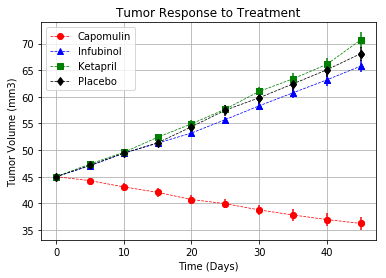

In [88]:
# Generate the Plot (with Error Bars)
x_axis = grouped_drug_df.index.values
cap_y = grouped_drug_df['Tumor Volume (mm3)', 'Capomulin']
cap_err = grouped_drug_df['Standard Error', 'Capomulin']
inf_y = grouped_drug_df['Tumor Volume (mm3)', 'Infubinol']
inf_err = grouped_drug_df['Standard Error', 'Infubinol']
ket_y = grouped_drug_df['Tumor Volume (mm3)', 'Ketapril']
ket_err = grouped_drug_df['Standard Error', 'Ketapril']
pla_y = grouped_drug_df['Tumor Volume (mm3)', 'Placebo']
pla_err = grouped_drug_df['Standard Error', 'Placebo']
plt.plot(x_axis,cap_y, marker ='o', color='red', linestyle='dashed', linewidth='0.75', label="Capomulin")
plt.plot(x_axis,inf_y, marker ='^', color='blue', linestyle='dashed', linewidth='0.75', label="Infubinol")
plt.plot(x_axis,ket_y, marker ='s', color='green', linestyle='dashed', linewidth='0.75', label="Ketapril")
plt.plot(x_axis,pla_y, marker ='d', color='black', linestyle='dashed', linewidth='0.75', label="Placebo")
plt.legend(loc='upper left' )
plt.errorbar(x_axis,cap_y,cap_err,fmt='o',color='red')
plt.errorbar(x_axis,inf_y,inf_err,fmt='^',color='blue')
plt.errorbar(x_axis,ket_y,ket_err,fmt='s',color='green')
plt.errorbar(x_axis,pla_y,pla_err,fmt='d',color='black')
plt.grid()

# Set a Title and Labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("Images/tumor_response.png")

## Metastatic Response to Treatment

In [89]:
meta_df.head()

,Drug,Timepoint,Metastatic Sites,Meta Standard Error
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


In [90]:
# Group the metastatic sites dataframe by Drug and Timepoint and store in a dataframe
grouped_meta_df = meta_df.pivot_table(index=['Drug','Timepoint'], values=['Metastatic Sites','Meta Standard Error'])

# Preview Dataframe
grouped_meta_df.head()

Meta Standard Error  Metastatic Sites
Drug      Timepoint                                       
Capomulin 0                     0.000000          0.000000
          5                     0.074833          0.160000
          10                    0.125433          0.320000
          15                    0.132048          0.375000
          20                    0.161621          0.652174

In [91]:
# Minor Data Munging to Re-Format the metastatic sites dataframe
flat_meta_df = meta_df.pivot(index='Timepoint',columns='Drug',values=['Metastatic Sites','Meta Standard Error'])

# Preview Dataframe
flat_meta_df

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                  Meta Standard Error  \
Drug       Propriva  Ramicane  Stelasyn Zoniferol           Capomulin   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000            0.000000   
5          0.320000  0.120000  0.240000  0.166667            0.074833   
10         0.565217  0.250000  0.478261  0.500000            0.125433   
15         0.764706  0.333333  0.782609  0.809524            0.132048   
20         1.000000  0.347826  0.952381  1.294118            0.161621   
25         1.357143  0.652174  1.157895  1.687500            0.181818   
30         1.615385  0.782609  1.388889  1.933333            0.172944   
35         2.300000  0.952381  1.562500  2.285714            0.169496   
40         2.777778  1.100000  1.583333  2.785714            0.175610   
45         2.571429  1.250000  1.727273  3.071429            0.202591   

                                                                       \
Drug       Ceftamin Infubinol  Ketapril  Naftisol   Placebo  Propriva   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.108588  0.091652  0.098100  0.093618  0.100947  0.095219   
10         0.152177  0.159364  0.142018  0.163577  0.115261  0.105690   
15         0.180625  0.194015  0.191381  0.158651  0.190221  0.136377   
20         0.241034  0.234801  0.236680  0.181731  0.234064  0.171499   
25         0.258831  0.265753  0.288275  0.185240  0.263888  0.199095   
30         0.249479  0.227823  0.347467  0.266667  0.300264  0.266469   
35         0.266526  0.224733  0.361418  0.330464  0.341412  0.366667   
40         0.289128  0.314466  0.315725  0.321702  0.297294  0.433903   
45         0.286101  0.309320  0.278722  0.351104  0.304240  0.428571   

                                         
Drug       Ramicane  Stelasyn Zoniferol  
Timepoint                                
0          0.000000  0.000000  0.000000  
5          0.066332  0.087178  0.077709  
10         0.090289  0.123672  0.109109  
15         0.115261  0.153439  0.111677  
20         0.119430  0.200905  0.166378  
25         0.119430  0.219824  0.236621  
30         0.139968  0.230641  0.248168  
35         0.145997  0.240983  0.285714  
40         0.160591  0.312815  0.299791  
45         0.190221  0.359062  0.286400

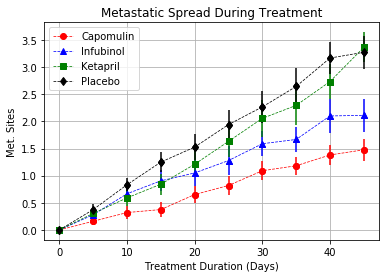

In [92]:
# Generate the Plot (with Error Bars)
x_axis = flat_meta_df.index.values
cap_met_y = flat_meta_df['Metastatic Sites', 'Capomulin']
cap_met_err = flat_meta_df['Meta Standard Error', 'Capomulin']
inf_met_y = flat_meta_df['Metastatic Sites', 'Infubinol']
inf_met_err = flat_meta_df['Meta Standard Error', 'Infubinol']
ket_met_y = flat_meta_df['Metastatic Sites', 'Ketapril']
ket_met_err = flat_meta_df['Meta Standard Error', 'Ketapril']
pla_met_y = flat_meta_df['Metastatic Sites', 'Placebo']
pla_met_err = flat_meta_df['Meta Standard Error', 'Placebo']
plt.plot(x_axis,cap_met_y, marker ='o', color='red', linestyle='dashed', linewidth='0.75', label="Capomulin")
plt.plot(x_axis,inf_met_y, marker ='^', color='blue', linestyle='dashed', linewidth='0.75', label="Infubinol")
plt.plot(x_axis,ket_met_y, marker ='s', color='green', linestyle='dashed', linewidth='0.75', label="Ketapril")
plt.plot(x_axis,pla_met_y, marker ='d', color='black', linestyle='dashed', linewidth='0.75', label="Placebo")
plt.legend(loc='upper left' )
plt.errorbar(x_axis,cap_met_y,cap_met_err,fmt='o',color='red')
plt.errorbar(x_axis,inf_met_y,inf_met_err,fmt='^',color='blue')
plt.errorbar(x_axis,ket_met_y,ket_met_err,fmt='s',color='green')
plt.errorbar(x_axis,pla_met_y,pla_met_err,fmt='d',color='black')
plt.grid()

# Set a Title and labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig("Images/metastatic_spread.png")

## Survival Rates

In [93]:
mouse_df.head()

,Drug,Timepoint,Mouse Count,Survival Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [94]:
# Group the mouse dataframe by Drug and Timepoint and store in a dataframe
flat_mouse_df = mouse_df.pivot(index='Timepoint',columns='Drug',values=['Mouse Count','Survival Rate'])

# Preview DataFrame
flat_mouse_df

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                      Survival Rate                     \
Drug      Ramicane Stelasyn Zoniferol     Capomulin Ceftamin Infubinol   
Timepoint                                                                
0               25       26        25           100      100       100   
5               25       25        24           100       84       100   
10              24       23        22           100       80        84   
15              24       23        21            96       76        84   
20              23       21        17            92       72        80   
25              23       19        16            88       72        72   
30              23       18        15            88       64        68   
35              21       16        14            88       56        48   
40              20       12        14            84       56        40   
45              20       11        14            84       52        36   

                                                                          
Drug      Ketapril Naftisol Placebo Propriva Ramicane Stelasyn Zoniferol  
Timepoint                                                                 
0              100      100     100      104      100      104       100  
5               92       92      96      100      100      100        96  
10              88       84      96       92       96       92        88  
15              76       84      80       68       96       92        84  
20              76       80      76       68       92       84        68  
25              76       72      68       56       92       76        64  
30              72       60      60       52       92       72        60  
35              68       60      56       40       84       64        56  
40              60       60      48       36       80       48        56  
45              44       52      44       28       80       44        56

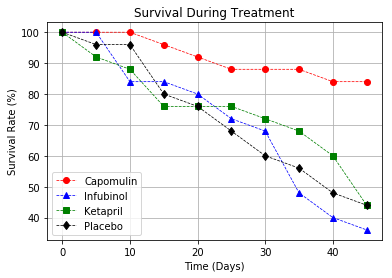

In [95]:
# Generate the Plot (Accounting for percentages)
x_axis = flat_mouse_df.index.values
cap_mouse_y = flat_mouse_df['Survival Rate', 'Capomulin']
inf_mouse_y = flat_mouse_df['Survival Rate', 'Infubinol']
ket_mouse_y = flat_mouse_df['Survival Rate', 'Ketapril']
pla_mouse_y = flat_mouse_df['Survival Rate', 'Placebo']
plt.plot(x_axis,cap_mouse_y, marker ='o', color='red', linestyle='dashed', linewidth='0.75', label="Capomulin")
plt.plot(x_axis,inf_mouse_y, marker ='^', color='blue', linestyle='dashed', linewidth='0.75', label="Infubinol")
plt.plot(x_axis,ket_mouse_y, marker ='s', color='green', linestyle='dashed', linewidth='0.75', label="Ketapril")
plt.plot(x_axis,pla_mouse_y, marker ='d', color='black', linestyle='dashed', linewidth='0.75', label="Placebo")
plt.legend(loc='lower left' )
plt.grid()

# Set a Title and labels
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("Images/survival_rate.png")

## Summary Bar Graph

In [96]:
# Calculate tumor volume change and store it in a new dataframe:
start_vol = drug_df.loc[drug_df['Timepoint'] == 0]
end_vol = drug_df.loc[drug_df['Timepoint'] == 45]
summary_df = pd.merge(start_vol, end_vol, on='Drug', how='outer', suffixes=('_start','_end'))
summary_df.drop(columns=['Standard Error_start','Standard Error_end'], axis=1, inplace=True)
summary_df['vol_chg'] = (summary_df['Tumor Volume (mm3)_end'] - summary_df['Tumor Volume (mm3)_start']) / summary_df['Tumor Volume (mm3)_start'] * 100
vol_chg_df = summary_df[['Drug','vol_chg']]

# Preview DataFrame
vol_chg_df

,Drug,vol_chg
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


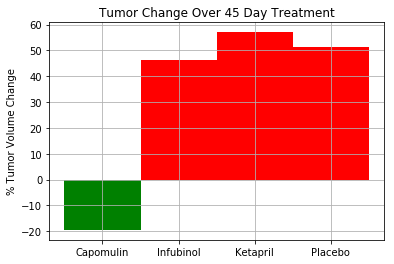

In [97]:
# Store all Relevant Percent Changes into a Tuple
vol_chg_df = vol_chg_df[(vol_chg_df['Drug'].isin(['Capomulin','Infubinol','Ketapril','Placebo']))]

# Create bar chart
x_axis = vol_chg_df['Drug']
y_axis = vol_chg_df['vol_chg']
format_y = [ '%.2f' % y for y in y_axis]
mask1 = y_axis < 0
mask2 = y_axis >= 0

plt.bar(x_axis[mask1], y_axis[mask1], width=1, color = 'green')
plt.bar(x_axis[mask2], y_axis[mask2], width=1, color = 'red')
plt.grid()

# Set a Title and labels
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# Save the Figure
plt.savefig("Images/tumor_chg.png")